# Example 4 - Data Viz with 3D Charts

## Minimise $$f(x, y) = \frac{1}{3^{-x^2 - y^2} + 1}$$

Minimise $$f(x, y) = \frac{1}{r + 1}$$ where $r$ is $3^{-x^2 - y^2}$

In [15]:
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm # color map

from sympy import symbols, diff
from math import log

In [14]:
#gradient descent funtion 
def gradient_1(derivative_func, initial_guess_x, learning_rate=0.02, precision=0.001, loop_num=300):
    new_x = initial_guess_x
    x_list = [new_x]
    slope_list = [derivative_func(new_x)]
    
    for i in range(loop_num):
        previous_x = new_x
        gradient = derivative_func(previous_x)
        new_x = previous_x - learning_rate * gradient
        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))
        step_size = abs(new_x - previous_x)
        if step_size < precision:
            break
    return new_x, x_list, slope_list

In [2]:
def f(x, y):
    r = 3**(-x**2 - y**2)
    return 1 / (r + 1)

In [3]:
# Make our x and y data
x_4 = np.linspace(start=-2, stop=2, num=200)
y_4 = np.linspace(start=-2, stop=2, num=200)

print('Shape of X array', x_4.shape)

x_4, y_4 = np.meshgrid(x_4, y_4)
print('Array after meshgrid: ', x_4.shape)

Shape of X array (200,)
Array after meshgrid:  (200, 200)


/var/folders/c5/yyls4_8s64l5jkqjxz8yqbkh0000gn/T/ipykernel_2861/1140010260.py:3: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


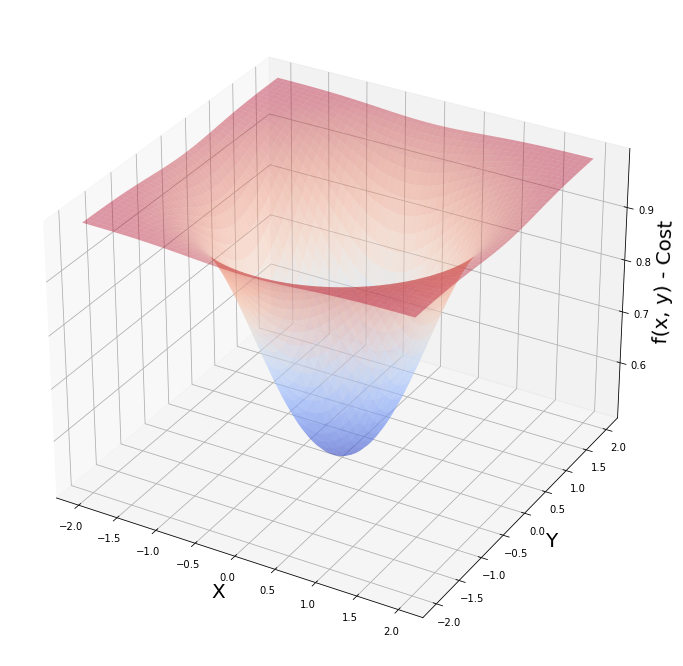

In [4]:
# Generating 3D Plot
fig = plt.figure(figsize=[16, 12])
ax = fig.gca(projection='3d')

ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x, y) - Cost', fontsize=20)

ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap=cm.coolwarm, alpha=0.4)

plt.show()

# Partial Derivatives & Symbolic Computation
## Minimise $$f(x, y) = \frac{1}{3^{-x^2 - y^2} + 1}$$

Minimise $$f(x, y) = \frac{1}{r + 1}$$ where $r$ is $3^{-x^2 - y^2}$

### $$\frac{\partial f}{\partial x} = \frac{2x\ ln(3) \cdot 3^{-x^2-y^2}}{\left(3^{-x^2-y^2} +1\right)^2}$$
### $$\frac{\partial f}{\partial y} = \frac{2y\ ln(3) \cdot 3^{-x^2-y^2}}{\left(3^{-x^2-y^2} +1\right)^2}$$

In [9]:
a, b = symbols('x, y')
print("Our cost function f(x,y) is: ",f(a,b))
print('Partial Derivative wrt x is: ', diff(f(a,b),a))
print('Value of f(x,y) at x= 1.8 and y = 1.0 is: ', f(a,b).evalf(subs={a:1.8, b:1.0}))
print('Value of Partial derivative wrt x at x= 1.8 and y = 1.0 is: ',
      diff(f(a,b),a).evalf(subs={a:1.8,b:1.0}))

Our cost function f(x,y) is:  1/(3**(-x**2 - y**2) + 1)
Partial Derivative wrt x is:  2*3**(-x**2 - y**2)*x*log(3)/(3**(-x**2 - y**2) + 1)**2
Value of f(x,y) at x= 1.8 and y = 1.0 is:  0.990604794032582
Value of Partial derivative wrt x at x= 1.8 and y = 1.0 is:  0.0368089716197505


# Batch Gradient Descent  with Sympy

In [19]:
learning_rate = 0.1
loop_num = 200
params = np.array([1.8,1.0])

for n in range(loop_num):
    gradient_x = diff(f(a,b),a).evalf(subs={a:params[0],b:params[1]})
    gradient_y = diff(f(a,b),b).evalf(subs={a:params[0],b:params[1]})
    gradients = np.array([gradient_x,gradient_y])
    params = params - learning_rate * gradients
    
# results
print("Values in gradient array: ", gradients)
print('Minimum occurs at X value of: ', params[0])
print('Minimum occurs at Y value of: ', params[1])
print('The cost is: ',f(params[0],params[1]))

Values in gradient array:  [0.000461440542096373 0.000256355856720208]
Minimum occurs at X value of:  0.000793898510134722
Minimum occurs at Y value of:  0.000441054727852623
The cost is:  0.500000226534985


In [23]:
def pdx(x,y):
    r = 3**(-x**2 -y**2)
    top = 2*x*log(3)* r
    btm = (r +1)**2
    return top /btm

In [24]:
def pdy(x,y):
    r = 3**(-x**2 -y**2)
    top = 2*y*log(3)* r
    btm = (r + 1)**2
    return top /btm

In [25]:
pdx(1.8,1.0)

0.036808971619750504

In [27]:
learning_rate = 0.1
loop_num = 200
params = np.array([1.8,1.0])
for n in range(loop_num):
    gradient_x = pdx(params[0],params[1])
    gradient_y = pdy(params[0],params[1])
    gradients = np.array([gradient_x,gradient_y])
    params = params - learning_rate * gradients
    
# results
print("Values in gradient array: ", gradients)
print('Minimum occurs at X value of: ', params[0])
print('Minimum occurs at Y value of: ', params[1])
print('The cost is: ',f(params[0],params[1]))

(2,)
Values in gradient array:  [0.00046144 0.00025636]
Minimum occurs at X value of:  0.0007938985101347202
Minimum occurs at Y value of:  0.0004410547278526219
The cost is:  0.5000002265349848


## Grahine 3D Gradient Descent & Advanced Numpy Arrays

In [56]:
# Advances numpy array practice
kirk = np.array([['captain','guatar']])
print(kirk.shape)

band = np.array([['gaya','na'],['kj','kj']])
print(band.shape)


(1, 2)
(2, 2)


In [57]:
root = np.append(arr=band, values=kirk,axis=0)
root
print(root.shape)

(3, 2)


In [59]:

root_q = np.append(arr=band, values=kirk.reshape(2,1), axis=1)
root_q

array([['gaya', 'na', 'captain'],
       ['kj', 'kj', 'guatar']], dtype='<U7')

In [60]:
root_q.shape

(2, 3)

In [62]:
print(kirk.reshape(2,1))

[['captain']
 ['guatar']]


In [69]:
learning_rate = 0.1
loop_num = 200
params = np.array([1.8,1.0])
values_array = params.reshape(1,2)
print(values_array.shape)
for n in range(loop_num):
    gradient_x = pdx(params[0],params[1])
    gradient_y = pdy(params[0],params[1])
    gradients = np.array([gradient_x,gradient_y])
    params = params - learning_rate * gradients
    #values_array= np.append(values_array,params.reshape(1,2), axis=0)
    # you can use cancatenate to appending to array or concatenating arrays
    values_array= np.concatenate((values_array, params.reshape(1,2)), axis=0)
    
# results
print("Values in gradient array: ", gradients)
print('Minimum occurs at X value of: ', params[0])
print('Minimum occurs at Y value of: ', params[1])
print('The cost is: ',f(params[0],params[1]))

(1, 2)
Values in gradient array:  [0.00046144 0.00025636]
Minimum occurs at X value of:  0.0007938985101347202
Minimum occurs at Y value of:  0.0004410547278526219
The cost is:  0.5000002265349848


/var/folders/c5/yyls4_8s64l5jkqjxz8yqbkh0000gn/T/ipykernel_2861/694110106.py:3: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


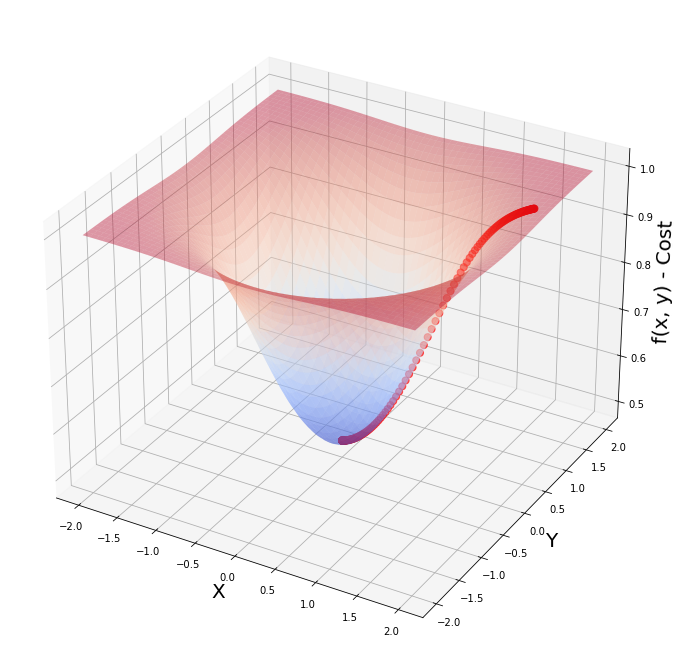

In [70]:
# Generating 3D Plot
fig = plt.figure(figsize=[16, 12])
ax = fig.gca(projection='3d')

ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x, y) - Cost', fontsize=20)

ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap=cm.coolwarm, alpha=0.4)
ax.scatter(values_array[:,0], values_array[:,1],
           f(values_array[:,0],values_array[:,1]), s =50, color = "red", alpha = 0.6)

plt.show()